## Self Avoiding Random Walk

A *random walk* is simulated on a computer by assuming that a walker begins at some location and takes steps in random directions, typically north, south, east, or west. This continues until some condition is met, for example when the random walker steps off the map. In this assignment, we will simulate a *self-avoiding random walker*. This is a random walker that walks randomly until it is either:

* trapped by its previous path, or
* walking off the map.

In order to test for the first stopping case, one must store the places visited by the walker.

The assignment is of interest to anyone trying to master 2D `numpy arrays`, and it has application to polymer chemistry in determining the length of chains that are possible. Below, find an introduction to creating, managing, and manipulating 2D `numpy arrays`.


### 2D numpy arrays
We will simulate a random walk using a 2D `numpy array`. Thus far, all of the `numpy` arrays that you have used have been 1D. Let me introduce you to how 2D arrays work:

In [3]:
from pylab import randint  # Get a function to create a random array
from __future__ import print_function

a = randint(1,11,(4,5)) # An array of random integers, 1-10. 4 rows, 5 columns

# Note the (4,5) gives (rows,columns). 

# (4,5) is like a list, but cannot be changed. It is called a 'tuple'.
# It is common for Python functions to accept tuples. They have to be 
# tuples (not lists) so that they are not accidentaly changed.

# view the array
print(a)

[[ 7  1  7  2  5]
 [ 2  8  5  7  8]
 [ 3  7  4 10  4]
 [ 1  1  9  8  5]]


In [4]:
# Array indexing is how you recover elements:
# In numpy, we use a[row][col] to retrieve an element at 
# position row,column

a[2][3]   # Show the element at position row = 2 col = 3 (remember to start at 0)

10

In [5]:
# We can also change a value, for example, make the number at row 1 column 2 -3

a[1][2]=-3 # Determine where the change takes place before studying the output.

print(a)

[[ 7  1  7  2  5]
 [ 2  8 -3  7  8]
 [ 3  7  4 10  4]
 [ 1  1  9  8  5]]


In [6]:
# The final array skill needed for this assignment is 
# to realize that variables can be used to generalize indexing
# For example, let us say the random walker is at row 1, column 2

row = 1 
col = 2

# Set everything next to row = 1, col = 2 to be -1:

a[row + 1][col] = -100 # SOUTH of the location (row,col)
a[row - 1][col] =  100 # NORTH
a[row][col + 1] =  -50 # EAST
a[row][col - 1] =   50 # WEST

a  #Study the output carefuly and make sure you understand

array([[   7,    1,  100,    2,    5],
       [   2,   50,   -3,  -50,    8],
       [   3,    7, -100,   10,    4],
       [   1,    1,    9,    8,    5]])

In [7]:
# So far, we've only created random arrays. It's often better to produce arrays of other 
# values. 

from numpy import ones, zeros, array

# For examples, an arrray of ones:
ones_array = ones((3,4))
print("Ones array:")
print(ones_array)
print()

# Or, an array of zeros:
zeros_array = zeros((6,5))
print("Zeros array:")
print(zeros_array)
print()

# For test data it is sometimes good to have a sequence in an array.
t = array(range(45)).reshape(9,5) # Think on how that reshape works!
print("Test array with sequence:")
print(t)
print()

# If you need to, you can always declare your own array:
# Observe that the array function takes lists of lists.
my_array = array([[1,2,3],[-4,-5,-6],[7,8,9]])
print("User defined array:")
print(my_array)


Ones array:
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]

Zeros array:
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]

Test array with sequence:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]]

User defined array:
[[ 1  2  3]
 [-4 -5 -6]
 [ 7  8  9]]


In [8]:
# Finally, you will need a way to track where the random walker is, 
# and has been.
# Try something like this:

path = zeros((10,10)) # Use 1 for visited, 0 for unvisited
row_c = 5 # current row
col_c = 5 # current col

# The following is to make it clear, but should be in a loop
# with random step directions:
path[row_c][col_c] = 1 # mark visited
row_c +=1 # Step south
path[row_c][col_c] = 1
col_c -=1 # Step west
path[row_c][col_c] = 1 
col_c -=1 # Step west
path[row_c][col_c] = 1
col_c -=1 # Step west
path[row_c][col_c] = 1
row_c -=1 # Step north
path[row_c][col_c] = 1
row_c -=1 # Step north
path[row_c][col_c] = 1
row_c -=1 # Step north
path[row_c][col_c] = 1
row_c -=1 # Step north
path[row_c][col_c] = 1
col_c +=1 # Step east
path[row_c][col_c] = 1

print("Final postion: (%i,%i) "%(row_c,col_c))
print(path)


Final postion: (2,3) 
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


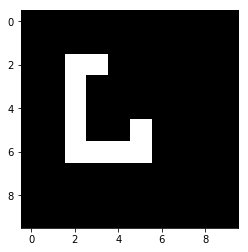

In [9]:
# Inspecting that array for the path is hard. Let's plot it instead.
from pylab import imshow,show,subplot,array
%matplotlib inline
imshow(path,interpolation='nearest',cmap='gray')
show()

### Assignment
Write code to simulate a self-avoiding random walker. The walker should continue taking random steps until it either gets stuck (all four neighboring points have been visited), or it moves off the map (the 2D array). The walk should be written in a single method that accepts an arguement `N`, specifying that the grid the walker moves on is `NxN`, and the number of trials to be done. The walker should always begin in the middle of the array (accepting that even size arrays will be off center). The method should return average (for the number of trials) length of the path, and the probability of the walker being trapped (number of times trapped divided by number of trials). 

Prepare plots of the average length of the path vs. 2D array size and probability of being trapped vs. 2D array size. Vary array dimensions between 20x20 and 100x100, increasing by 5 for each run. Do 500 trials for each array size. See plots below for expected output.

In [22]:
#fixed the issue; i misinterpreted the problem. I had not allowed the walekr to walk off the grid if it wanted
#the stats come out closer to what they should be now

#pylab contains numpy under the same namespace, so everythign can be grouped togetehr
from pylab import ones,zeros,array,plot,show,title,xlabel,ylabel,randint,imshow,subplot
#from random import shuffle, no longer necessary

def int_ary(s_tp): #takes in a tuple and gives back starting positions and a 2D array of zeros
    s_tup=(s_tp,s_tp)
    garden=zeros(s_tup) #preparing the 2D array that will be walked around in, accepts N as a tuple
    rows,cols=s_tup #unpacking the rows and columns values from the tuple
    #assigning the starting x and y positions by how the rows and columns numbers divide
    if rows%2!=0:
        st_x=(rows//2)+(rows%2)-1 #this roudns up so we always are at the middle
    else:
        st_x=(rows//2)+randint(0,2)-1 #we introduce randomness to decrease bias of side of even div we are on
    if cols%2!=0:
        st_y=(cols//2)+(cols%2)-1 #same thing as above but for columns
    else:
        st_y=(cols//2)+randint(0,2)-1
    st_pos=(st_x,st_y) #starting position as a tuple
    return(st_pos,garden)

#accepts a tuple of cirrent positions and the array and returns a tuple of where to move next
def move_it(posy,pty): #we like to MOVE IT! MOVE IT!
    cu_x,cu_y=posy
    m_possible=[]
    trp=0
    try: #testing for up
        if pty[cu_x][cu_y+1]==0: #we make sure that teh space has nto been visited before
            m_possible.append((cu_x,cu_y+1)) #we make this an option to go to
        else: #we are keeping track of being trapped by own path
            if pty[cu_x][cu_y+1]==1:
                trp+=1
    except:
        m_possible.append("None") #you have the option to walk off the grid now
    try: #testign for down
        if pty[cu_x][cu_y-1]==0 and (cu_y-1)!=(-1): #make sure we don't do reverse indexing and it hasn't been visited
            m_possible.append((cu_x,cu_y-1))
        else:
            if pty[cu_x][cu_y-1]==1:
                trp+=1
            elif (cu_y-1)==(-1): #you may walk off the grid now
                m_possible.append("None")
    except:
        pass
    try: #testign for right
        if pty[cu_x+1][cu_y]==0:
            m_possible.append((cu_x+1,cu_y))
        else:
            if pty[cu_x+1][cu_y]==1:
                trp+=1
    except:
        m_possible.append("None")
    try: #testign for left
        if pty[cu_x-1][cu_y]==0 and (cu_x-1)!=(-1):
            m_possible.append((cu_x-1,cu_y))
        else:
            if pty[cu_x-1][cu_y]==1:
                trp+=1
            elif (cu_x-1)==(-1): #you can now walk off the grid as an option
                m_possible.append("None")
    except:
        pass
    if len(m_possible)>0: #we make a a valif move if possible
        move=m_possible[randint(0,len(m_possible))]
    elif trp==4: #we return trapped if we have made our own path trapping us
        move="Trapped"
    return move


def self_avoid_random_walk(N,trials,PLOT=False):
    steps,trapped=0,0 #total steps made, when trapped
    for i in range(trials): #this for loop is for our number of simulations
        stpos,grid=int_ary(N) #we reintialize the starting positions and grid everytime
        tnot=0 #we reset the number of times trapped or off grid so taht the whiel loop restarts
        c_x,c_y=stpos #we reset to starting position everytime
        while tnot<1: #we continue to move around as logn as we don;t go off grid or get trapped
            grid[c_x][c_y]=1 #we say that we have been where we are standing
            do_it=move_it((c_x,c_y),grid) #we then produce the next move
            if do_it=="Trapped": #we record the trapped scenario and break the loop
                tnot+=1
                trapped+=1
            elif do_it=="None": #we just aren't allowed to walk off the grid, so we only break the loop
                tnot+=1
            else: #huzzah, we can make a move, so we do it!
                c_x,c_y=do_it #we unpack the tuple and reassign new positions
                steps+=1 #we record the move after we make it as a step
            #print(do_it)
            #imshow(grid,interpolation='nearest',cmap='gray')
            #show()
    return(steps/trials,trapped/trials)

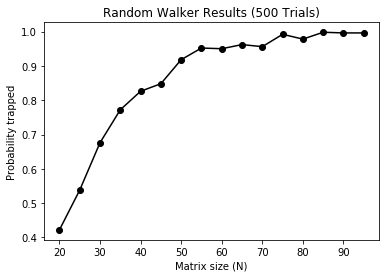

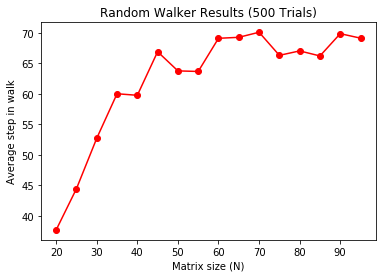

In [24]:
l = []   # Hold the average length of random walks in a list.
p = []   # Hold the probability of getting trappend in a list.
rs = range(22,102,5)   # These are the sizes of grids that are explored.
for s in rs:   # for each size of grid.
    t = self_avoid_random_walk(s,500,False)   # Get the data through simulation. store in t.
    p.append(t[1])  # record the probability of being trapped
    l.append(t[0])  # record the average length of walk

# some plotting code that should be somewhat clear...
plot(array(rs)-2,p,'ko-')
title("Random Walker Results (500 Trials)")
xlabel("Matrix size (N)")
ylabel("Probability trapped")
show()

plot(array(rs)-2,l,'ro-')
title("Random Walker Results (500 Trials)")
xlabel("Matrix size (N)")
ylabel("Average step in walk")
show()

In [25]:
#incoreect interpretation, thee below contrains the alker to 
#only valid moves within the grid, unless forced off the grid
#the walker in resality should be able to walk off the grid if it wants to

#accepts a tuple of cirrent positions and the array and returns a tuple of where to move next
def move_it(posy,pty): #we like to MOVE IT! MOVE IT!
    cu_x,cu_y=posy
    m_possible=[]
    trp=0
    try: #testing for up
        if pty[cu_x][cu_y+1]==0: #we make sure that teh space has nto been visited before
            m_possible.append((cu_x,cu_y+1)) #we make this an option to go to
        else: #we are keeping track of being trapped by own path
            if pty[cu_x][cu_y+1]==1:
                trp+=1
    except:
        pass
    try: #testign for down
        if pty[cu_x][cu_y-1]==0 and (cu_y-1)!=(-1): #make sure we don't do reverse indexing and it hasn't been visited
            m_possible.append((cu_x,cu_y-1))
        else:
            if pty[cu_x][cu_y-1]==1:
                trp+=1
    except:
        pass
    try: #testign for right
        if pty[cu_x+1][cu_y]==0:
            m_possible.append((cu_x+1,cu_y))
        else:
            if pty[cu_x+1][cu_y]==1:
                trp+=1
    except:
        pass
    try: #testign for left
        if pty[cu_x-1][cu_y]==0 and (cu_x-1)!=(-1):
            m_possible.append((cu_x-1,cu_y))
        else:
            if pty[cu_x-1][cu_y]==1:
                trp+=1
    except:
        pass
    if len(m_possible)>0: #we make a a valif move if possible
        move=m_possible[randint(0,len(m_possible))]
    elif trp==4: #we return trapped if we have made our own path trapping us
        move="Trapped"
    else: #we return none if we will walk out of the garden
        move="None"
    return move